In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE




1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 



In [14]:

bottle_df = pd.read_csv("bottle.csv", low_memory = False)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [16]:

bottle_df.dropna(axis=1, how='all', thresh = bottle_df.shape[0]*0.3, inplace=True)
bottle_df.drop(['Cst_Cnt','Btl_Cnt','Sta_ID','Depth_ID'],axis = 1, inplace = True)
bottle_df = bottle_df.loc[:,bottle_df.nunique()>100]
bottle_df = bottle_df[bottle_df['Salnty'].notna()]
bottle_df

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,NO2uM,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,NaN,NaN,...,25.640,233.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,NaN,NaN,...,25.650,232.5,0.010,NaN,NaN,NaN,NaN,NaN,NaN,8
2,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,NaN,NaN,...,25.650,232.8,0.020,NaN,NaN,NaN,NaN,NaN,NaN,10
3,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,NaN,NaN,...,25.640,234.1,0.040,NaN,NaN,NaN,NaN,NaN,NaN,19
4,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,NaN,NaN,...,25.640,234.0,0.040,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47,0.22,1.77,0.029,...,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47,0.22,1.77,0.029,...,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,2
864860,5,18.692,33.4150,5.796,23.88911,108.46,253.06,0.20,1.75,0.027,...,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,5
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92,0.25,1.99,0.030,...,24.014,389.1,0.040,5.82,107.7,2.0,0.25,0.1,0.03,10


In [17]:
bottle_df.corrwith(bottle_df['Salnty'])

Depthm         0.572630
T_degC        -0.505266
Salnty         1.000000
O2ml_L        -0.823870
STheta         0.603470
O2Sat         -0.790231
Oxy_µmol/Kg   -0.824338
PO4uM          0.825373
SiO3uM         0.795998
NO2uM         -0.151627
NO3uM          0.849224
R_Depth        0.572629
R_TEMP        -0.505268
R_POTEMP      -0.507023
R_SALINITY     0.997428
R_SIGMA        0.628311
R_SVA         -0.698367
R_DYNHT        0.669824
R_O2          -0.823871
R_O2Sat       -0.790542
R_SIO3         0.796000
R_PO4          0.825378
R_NO3          0.849227
R_NO2         -0.151664
R_PRES         0.571405
dtype: float64

In [18]:
bottle_drop_df = bottle_df.drop(['NO2uM','R_Depth','R_SALINITY','R_TEMP','R_POTEMP',
              'R_SIGMA','R_O2','R_O2Sat','R_PO4','R_NO3','R_NO2','R_SIO3'], axis = 1)

In [19]:
bottle_drop_df


,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,NO3uM,R_SVA,R_DYNHT,R_PRES
0,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,NaN,NaN,233.0,0.000,0
1,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,NaN,NaN,232.5,0.010,8
2,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,NaN,NaN,232.8,0.020,10
3,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,NaN,NaN,234.1,0.040,19
4,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,NaN,NaN,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47,0.22,1.77,0.10,402.4,0.000,0
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47,0.22,1.77,0.10,402.5,0.008,2
864860,5,18.692,33.4150,5.796,23.88911,108.46,253.06,0.20,1.75,0.09,400.8,0.020,5
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92,0.25,1.99,0.11,389.1,0.040,10


In [20]:


bottle_drop_df.fillna(value = bottle_drop_df.mean(), inplace=True)


In [21]:
bottle_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817509 entries, 0 to 864862
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       817509 non-null  int64  
 1   T_degC       817509 non-null  float64
 2   Salnty       817509 non-null  float64
 3   O2ml_L       817509 non-null  float64
 4   STheta       817509 non-null  float64
 5   O2Sat        817509 non-null  float64
 6   Oxy_µmol/Kg  817509 non-null  float64
 7   PO4uM        817509 non-null  float64
 8   SiO3uM       817509 non-null  float64
 9   NO3uM        817509 non-null  float64
 10  R_SVA        817509 non-null  float64
 11  R_DYNHT      817509 non-null  float64
 12  R_PRES       817509 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 87.3 MB


2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

RFE

<AxesSubplot:>

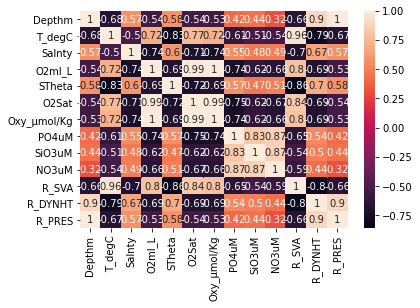

In [22]:
bottle_drop_df.corr()['T_degC']

correlation = bottle_drop_df.corr()
sns.heatmap(correlation,annot=True)

In [23]:
X=bottle_drop_df.drop('T_degC',axis=1)
y=bottle_drop_df['T_degC']


In [25]:
bottle_drop_df.head()


,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,NO3uM,R_SVA,R_DYNHT,R_PRES
0,0,10.50,33.440,3.423047,25.649,57.103779,148.808694,1.549871,26.651415,17.347675,233.0,0.00,0
1,8,10.46,33.440,3.423047,25.656,57.103779,148.808694,1.549871,26.651415,17.347675,232.5,0.01,8
2,10,10.46,33.437,3.423047,25.654,57.103779,148.808694,1.549871,26.651415,17.347675,232.8,0.02,10
3,19,10.45,33.420,3.423047,25.643,57.103779,148.808694,1.549871,26.651415,17.347675,234.1,0.04,19
4,20,10.45,33.421,3.423047,25.643,57.103779,148.808694,1.549871,26.651415,17.347675,234.0,0.04,20


In [24]:

model=LinearRegression()
rfe=RFE(model, n_features_to_select=11)   

X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
print(rfe.score(X,y))

cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[ True  True  True  True  True  True  True False  True  True  True  True]
[1 1 1 1 1 1 1 2 1 1 1 1]
0.9898836505888365
Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM',
       'NO3uM', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')


3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 


In [31]:
X1= bottle_drop_df[['Depthm', 'Salnty', 'O2ml_L']]
y1= bottle_drop_df['T_degC']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=1)

mlr=LinearRegression()
mlr.fit(X1_train,y1_train)

y1_pred=mlr.predict(X1_test)

accuracy_score = mlr.score(X1,y1)
print(accuracy_score)

0.6547757451425403


In [27]:
mlr.intercept_

-66.47472757008771

In [28]:
mlr.coef_

array([-0.00644327,  2.1811758 ,  1.44502709])

y= -66.47 + .00644depthm + 2.18slanty + 1.445O2ml_L

4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.


Accuracy score of 65% for this week. My accuracy score last week was 14%. It is an improvement but I'm guessing that has a lot more to do with user error than anything the models have done. 

5.	Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 


In [18]:
df = pd.read_csv("diabetes.csv")
df
#df.info()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

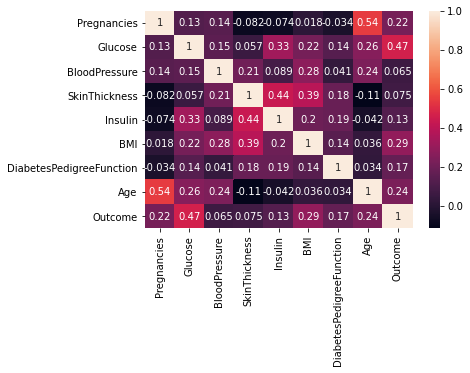

In [19]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

In [20]:
X = df[['Age', 'BMI', 'Pregnancies']]
y = df['Outcome']



In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=50)

In [22]:

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)



In [23]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
logregaccuracy=accuracy_score(y_pred,y_test)
logregaccuracy

0.6901041666666666

6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

I think in class we talked about recall being the best way because false negatives are the most dangerous and we don't want to miss them. 

7.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

The accuracy on my KNN was slightly better. 

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy


0.6927083333333334